In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import numpy as np
import pandas as pd

## Today

* About this course
* Logistics
* Start Parameter Estimation

## About this course 

This course introduces topics in current applications of machine learn-
ing for Data Science minor students. Topics include machine learning models, supervised and
unsupervised learning, loss functions, risk, empirical risk and overfitting, regression and classifi-
cation, clustering, gradient boosting, decision trees and random forests, and a brief introduction
to Neural Networks and deep learning.

## Who is this course intended for?

* The only prerequisite for this course is Data 119 which can be taken concurrently. 
* Students who have not taken Data 118 or 119 should have an equivalent expertise in Python and Statistics
* You should talk to me if you have questions about this!!

## Syllabus Highlights

### Grading:  
  * Homework: 30%
  * Midterm: 30% 
  * Final Project: 40% 

**Homework:** main opportunity to practice concepts we cover in class

There will be approximately 6 Homework Assignments due on Thursdays by 11:59pm

Late assignments will NOT be accepted

Extensions will NOT be given 

Instead, I will automatically drop your lowest Homework score - PLEASE save this for a time that you would have needed leniency on an assignment!

### Submitting Homework:
  * Use Gradescope
  * Submit as a pdf - see syllabus for Quarto tutorial
  * You may need to integrate both code and mathematical expressions
    * Optional but useful tools for this - see syllabus for more detail
      * LaTex
      * MathPix Snipping Tool
      * IPython.display

**Midterm:** a written exam given in class on February 13th

**Final Project:** essentially a take-home final exam - more information provided later in the quarter

### Software
* You will need the ability to work with .py and .ipynb files to complete assignments and view lectures
* You may use Jupyter, Anaconda, VS Code, or another IDE of your choice
* You will also need Quarto to convert .ipynb files into pdfs

### Discussion
We’ll be using Canvas and Ed for class communication, assignments, etc.

I will assume that any announcement made on Canvas or on Ed is known to everyone in class within
one business day of it being posted.

Best Practices for Ed Discussion
* Use Ed instead of email for any questions related to course content or logistics
* If it is not a question unique to yourself, post it publicly so others may benefit from the answer
* Check that your question has not already been asked and answered before posting
* Answer other students' questions whenever you can
* Heart questions and answers you find useful
* Ed can be used for discussion as well as questions

### Emails
If you have something that you want to talk to me about individually, you are encouraged to
send me an email.

But please know that I get a lot of emails from students at multiple schools so please include:
1. Your full name as it appears on Canvas
2. The number and/or name of the course you are in
3. The section number of the course you are in
4. The name or number of the assignment you are referring to if applicable



Much more information is provided in the syllabus. Your assignment for this week is to read it!

### Concepts build on each other:
  * Don't wait until last minute!
  * Don't let yourself fall behind - it will not be easy to catch up
  * Ask for help often
  * Take advantage of office hours

## In-Class Participation

* Have the notebooks downloaded and ready before class  
* Ask questions often  
* Work through activities  
* Think carefully through questions


## Machines that learn: examples and overview

<img src="https://github.com/david-biron/DATA221imgs/blob/main/OrangeSorter.png?raw=true"  align="left" width="400">

### This machine does not learn. Why?

In [76]:
def orange_sorter(diameter, how_orange):
    """
    Sort an orange into ripe versus unripe buckets.
    
    Args:
        -- diameter (float): the diameter of the orange, 
                             measured in centimeters
        -- how_orange (int): how orange the color of the orange is, 
                             measured on a Likert scale 1-7
    
    Returns: 
        -- ripe (boolean): whether the orange is ripe or not
    """
    diameter_thresh = 4     # orange must be at least 4 inches 
                            # in diameter to be considered ripe
    how_orange_thresh = 3   # orange must be greater than 3 on 
                            # Likert scale to be considered ripe
    
    if (diameter > diameter_thresh) and (how_orange > how_orange_thresh):
        ripe = True
    else:
        ripe = False

    return ripe

## It being an ML course, lets make a machine learn something 


### We would first create a *labeled* training data set:
* Ask an (expert) to **label** each orange as *ripe* or *unripe*
$$y_i \in \{\textrm{ripe}, \textrm{unripe}\}$$
* Then train a machine to predict the **label**, given the **features**:

$$y_i \approx f(X_i^{\textrm{diameter}}, X_i^{\textrm{color}}, \dots)$$

#### Ask: why might we prefer this approach?


---




### For the examples below

* There are two classes of dots: 'blue' (unripe) and 'orange' (ripe). 

* The class a dot belongs to is (roughly) determined by its location on the x-y plane. 

* When convenient/necessary: </br>
ripe $\leftrightarrow$ 'orange' $\leftrightarrow 1$ </br>
unripe $\leftrightarrow$ 'blue' $\leftrightarrow 0$ </br>


</br> 

### Generate some clean data

(and hereby skip much of the effort that goes into data-driven analyses)

<img src="https://github.com/david-biron/DATA221imgs/blob/main/BigDataBorat.png?raw=true" width="400">



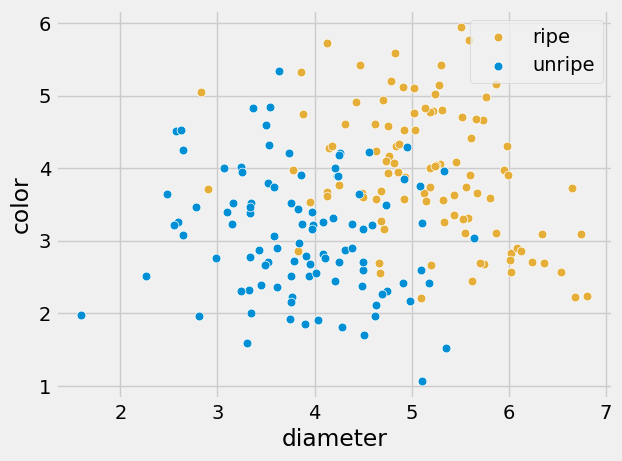

In [77]:
from numpy.random import multivariate_normal as mvn
import seaborn as sns

N = 100
blue = mvn(mean=[4, 3], cov=[[0.6, -0.1],
                             [-0.1, 0.8]], size=N)

orange = mvn(mean=[5, 4], cov=[[0.7, -0.2],
                               [-0.2, 0.7]], size=N)


xb, yb = [p[0] for p in blue], [p[1] for p in blue]
xo, yo = [p[0] for p in orange], [p[1] for p in orange]

df = pd.DataFrame({'diameter': np.append(xb, xo), 
                   'color': np.append(yb, yo),
                   'ripe': np.append(np.zeros(len(xb)), 
                                     np.ones(len(xo)))}) 
                                     # blue=0, orange=1

sns.scatterplot(x=xo, y=yo, marker='o', s=40, 
                color='C2', label='ripe')
sns.scatterplot(x=xb, y=yb, marker='o', s=40, 
                color='C0', label='unripe');

plt.xlabel('diameter')
plt.ylabel('color')
plt.legend();



## One way to differentiate between the groups would be a line: 

* Calculate the linear regression of all points where 'blue' $\leftrightarrow 0$ and 'orange' $\leftrightarrow 1$. 

* Use the model fitted with these known datapoints to predict the color of any new point that comes along (by setting a threshold on the response, $\hat y$). 

* Admittedly, this is **not** a very good way to tackle binary classification. 



### The linear regression *model* for data point $i$ is:
### $$y_i = \beta_0 + \beta_1 X_i^{\textrm{diameter}} + \beta_2 X_i^{\textrm{color}} + \epsilon_i$$
#### where the noise is assumed to be Gaussian:
#### $$\epsilon_i \sim \mathcal{N}(0,1)$$

In [78]:
df

,diameter,color,ripe
0,4.214996,2.449152,0.0
1,4.621176,1.965354,0.0
2,4.264530,4.205613,0.0
3,3.530012,4.317845,0.0
4,4.390565,3.225746,0.0
...,...,...,...
195,6.020464,2.569700,1.0
196,4.630492,3.577564,1.0
197,4.636817,4.234255,1.0
198,5.138724,4.833314,1.0


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr
import pandas as pd 

###############################################
# Split data to training and testing datasets #
###############################################
X_train, X_test, y_train, y_test = \
    train_test_split(df[['diameter','color']], 
                     df['ripe'], test_size=0.005)

##############################################
# Initialize an instance of the model object #
##############################################
model = lr(fit_intercept=True)

##########################################
# Train the model / fit model parameters #
##########################################
model.fit(X_train, y_train)

beta0, beta1, beta2 = model.intercept_, model.coef_[0], model.coef_[1]
print_str = 'Model coefficients: beta0=%.2f, beta1=%.2f, beta2=%.2f\n'
print(print_str%(beta0, beta1, beta2));

Model coefficients: beta0=-1.56, beta1=0.30, beta2=0.20



### The prediction of $y_i$ given a *fitted* model is:
### $$\widehat{y}_i = \widehat{\beta}_0 + \widehat{\beta}_1 X_i^{\textrm{diameter}} + \widehat{\beta}_2 X_i^{\textrm{color}}$$

In [80]:
##################
# Test the model #
##################
print('Testing datapoint:\n') 
print(X_test)

# use the scikit-learn predict function
y_pred = float(model.predict(X_test)[0])

print('\nModel prediction:\n')
print(f'y = {round(y_pred, 2)}')

Testing datapoint:

     diameter   color
195  6.020464  2.5697

Model prediction:

y = 0.77


In [81]:
# verify the predict function manually
y_pred_manual = beta0 + beta1 * X_test.iloc[0,0] + \
                        beta2 * X_test.iloc[0,1]

print('\nModel prediction (manual):\n')
print(f'y = {round(y_pred_manual, 2)}')

# assert they are equal (within tolerance)
# if condition returns True, then nothing happens
# if condition returns False, AssertionError is raised:
assert np.allclose(y_pred, y_pred_manual)


Model prediction (manual):

y = 0.77


### Problem: 

The classifier gives us real numbers (not necessarily between $0$ and $1$, BTW). 

How do we decide if a dot should be blue ($0$) or orange ($1$)? 

Suggestions? 

<br><br><br><br><br> 

<details><summary><button> Click the arrow</button></summary>

For any new point: <br>
    if the linear regression predicts $< \frac{1}{2}$: <br> 
    $\ \ \ \ $ guess 'unripe' <br>
    else: <br>
    $\ \ \ \ $ guess 'ripe' 

</details




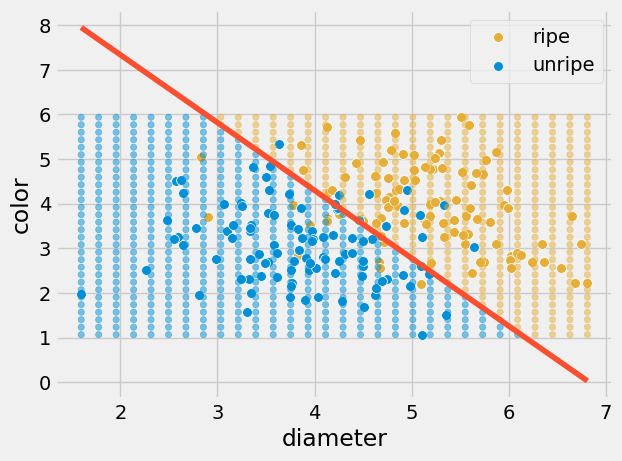

In [82]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=UserWarning)

# Calculate and plot the y_hat=0.5 line 
x = np.linspace(df['diameter'].min(), df['diameter'].max(),10)
y = -1*beta1/beta2 * x + (0.5-beta0)/beta2 # beta0 +beta1*x_diam + 
                                                # beta2*x_color = 0.5
sns.lineplot(x=x, y=y, color='C1')

def decide_class_lin_reg(prediction):
    '''
    Decide class 'blue' or 'orange' based on numeric prediction 
    of a linear regression classifier
    '''
    if prediction < 0.5:
        return('C0')
    else: 
        return('C2')     

def plot_classes_on_mesh(x_vals, y_vals, N, mdl, decide_func): 
    '''
    Graphically demonstrate the classifier performance on a mesh 
    determined by the the data values and the resolution (N).  
    
    '''
    sns.scatterplot(x=xo, y=yo, marker='o', s=50, 
                    color='C2', label='ripe')
    sns.scatterplot(x=xb, y=yb, marker='o', s=50, 
                    color='C0', label='unripe') 
     

    x_grid = np.linspace(x_vals.min(), x_vals.max() , N)
    y_grid = np.linspace(y_vals.min(), y_vals.max() , N)
    
    xax, yax = np.meshgrid(x_grid, y_grid, indexing="ij") 
    # enable plotting all dots with single plt.scatter command   

    clrs = np.empty(xax.shape, dtype='object') # dtype is important: 
                             # dtype='str' does not behave the same! 
    for i in range(len(x_grid)):
        for j in range(len(y_grid)):
            xy = np.array([ [x_grid[i],y_grid[j]] ]) # extra [ ] 
                                      # required dim for predict
            clrs[i,j] = decide_func(mdl.predict(xy)) 
    plt.scatter(xax, yax, c=clrs.flatten(), s=20, alpha=0.5)

    plt.xlabel('diameter')
    plt.ylabel('color')
    plt.legend()
    return()

### The following code is simpler 
### but plotting one dot at a time takes long...
###
#    xs = np.linspace(x_vals.min(), x_vals.max(), N)
#    ys = np.linspace(y_vals.min(), y_vals.max(), N)

#    for x in xs:
#        for y in ys:
#            y_hat = mdl.predict(np.array([[x,y]]))[0] 
#            sns.scatterplot(x=[x], y=[y], s=8, 
#                            color=decide_func(y_hat))


# Add predicitons for all mesh points 
N = 30
plot_classes_on_mesh(df['diameter'], 
                     df['color'], N, model, 
                     decide_class_lin_reg);



## But the border between blue and orange dots is not necessarily a straight line... 

### In DATA 11900 you have seen better algorithms for binary classification 

### How about K Nearest Neighbors? 

In [83]:
from sklearn.neighbors import KNeighborsClassifier as knn
warnings.filterwarnings(action='ignore', category=FutureWarning)

###############################################
# Split data to training and testing datasets #
###############################################
X_train, X_test, y_train, y_test = \
     train_test_split(df[['diameter','color']], 
                      df['ripe'], test_size=0.005)

##############################################
# Initialize an instance of the model object #
##############################################
model = knn(n_neighbors=15) # Consider 15 nearest neighbors

##########################################
# Train the model / fit model parameters #
##########################################
model.fit(X_train, y_train)

##################
# Test the model #
##################
print('Testing datapoint:\n') 
print(X_test)

# use the scikit-learn predict function
y_pred = float(model.predict(X_test)[0])

print('\nModel prediction:\n')
print(f'y = {round(y_pred, 2)}')



Testing datapoint:

    diameter     color
28  4.082759  2.813448

Model prediction:

y = 0.0


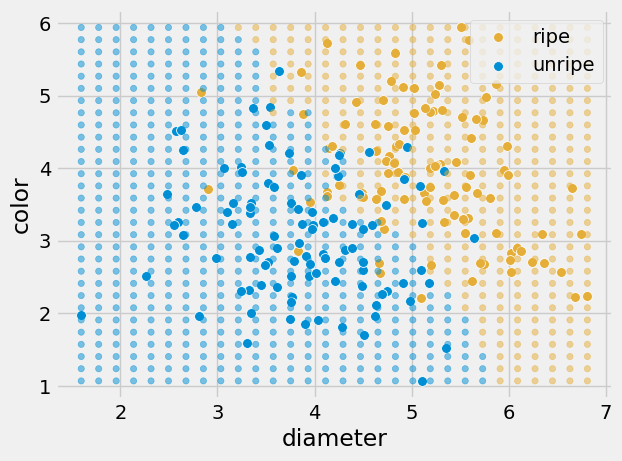

In [84]:
def decide_class_knn(prediction):
    '''
    Decide class 'blue' or 'orange' based on prediction of a 
    k nearest-neighbors classifier
    '''
    if prediction == 0:
        return('C0')
    elif prediction == 1: 
        return('C2')
    else:
        return('C4')


# Add predictions for all mesh points 
N = 30
plot_classes_on_mesh(df['diameter'], df['color'], N, 
                     model, decide_class_knn);




### What if we only considered k=1 nearest neighbor for deciding on the class? 

Testing datapoint:

    diameter    color
76  4.484678  2.37169

Model prediction:

y = 0.0


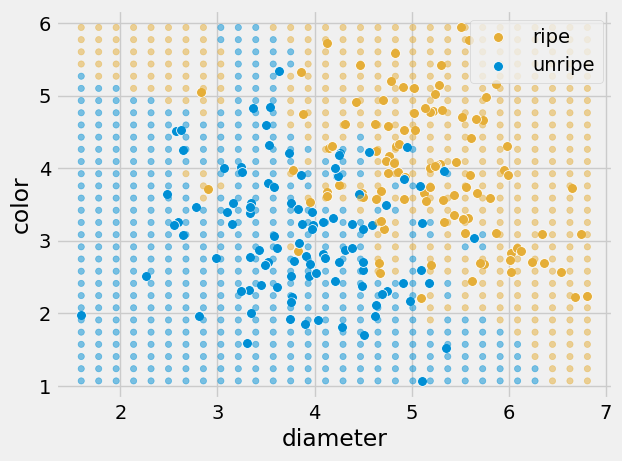

In [85]:
###############################################
# Split data to training and testing datasets #
###############################################
X_train, X_test, y_train, y_test = \
    train_test_split(df[['diameter','color']], 
                     df['ripe'], test_size=0.005)

##############################################
# Initialize an instance of the model object #
##############################################
model = knn(n_neighbors=1) # Consider 1 nearest neighbor

##########################################
# Train the model / fit model parameters #
##########################################
model.fit(X_train, y_train)

##################
# Test the model #
##################
print('Testing datapoint:\n') 
print(X_test)

# use the scikit-learn predict function
y_pred = float(model.predict(X_test)[0])

print('\nModel prediction:\n')
print(f'y = {round(y_pred, 2)}')

# Add predictions for all mesh points 
N = 30
plot_classes_on_mesh(df['diameter'], df['color'], N, 
                     model, decide_class_knn);



## Or logistic regression? 

(seen this in DATA 11900; note the identical workflow)

<br/> 

In [86]:
from sklearn.linear_model import LogisticRegression

###############################################
# Split data to training and testing datasets #
###############################################
X_train, X_test, y_train, y_test = \
    train_test_split(df[['diameter','color']], 
                     df['ripe'], test_size=0.005)

##############################################
# Initialize an instance of the model object #
##############################################
model = LogisticRegression()

##########################################
# Train the model / fit model parameters #
##########################################
model.fit(X_train, y_train)

##################
# Test the model #
##################
print('Testing datapoint:\n') 
print(X_test)

# use the scikit-learn predict function
y_pred = float(model.predict(X_test)[0])

print('\nModel prediction:\n')
print(f'y = {round(y_pred, 2)}')



Testing datapoint:

     diameter     color
108  4.664738  2.687022

Model prediction:

y = 0.0


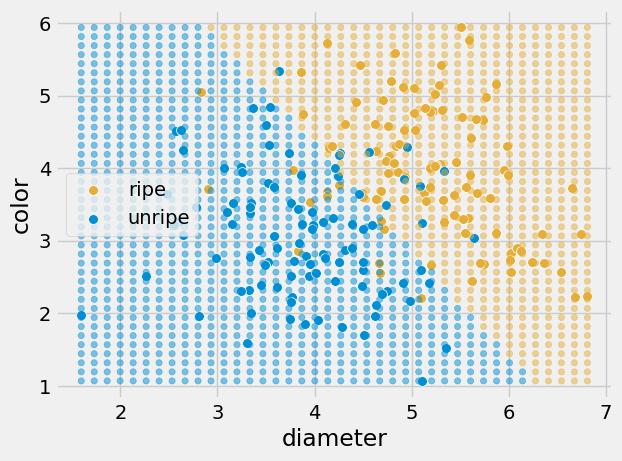

In [87]:
def decide_class_logr(prediction):
    '''
    Decide class 'blue' or 'orange' based on prediction of a 
    logistic regression classifier
    '''
    if prediction == 0:
        return('C0')
    elif prediction == 1: 
        return('C2')
    else:
        return('C4')


# Add predicitons for all mesh points 
N = 40
plot_classes_on_mesh(df['diameter'], df['color'], N, 
                     model, decide_class_logr);



## Or a decision tree? 

(briefly discussed in DATA 11900; note the identical workflow)

<br/> 

In [88]:
from sklearn.tree import DecisionTreeClassifier 

###############################################
# Split data to training and testing datasets #
###############################################
X_train, X_test, y_train, y_test = \
    train_test_split(df[['diameter','color']], 
                     df['ripe'], test_size=0.005)

##############################################
# Initialize an instance of the model object #
##############################################
model = DecisionTreeClassifier()

##########################################
# Train the model / fit model parameters #
##########################################
model.fit(X_train, y_train)

##################
# Test the model #
##################
print('Testing datapoint:\n') 
print(X_test)

# use the scikit-learn predict function
y_pred = float(model.predict(X_test)[0])

print('\nModel prediction:\n')
print(f'y = {round(y_pred, 2)}')




Testing datapoint:

    diameter     color
60   5.35617  1.514809

Model prediction:

y = 0.0


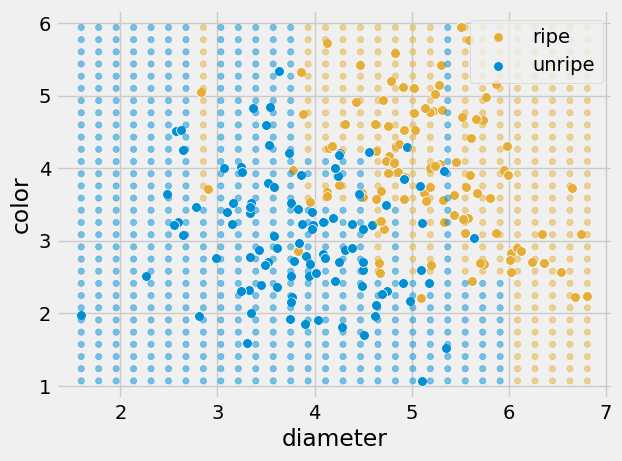

In [89]:
def decide_class_dt(prediction):
    '''
    Decide class 'blue' or 'orange' based on prediction of a 
    decision tree classifier
    '''
    if prediction == 0:
        return('C0')
    elif prediction == 1: 
        return('C2')
    else:
        return('C4')


# Add predicitons for all mesh points 
N = 30
plot_classes_on_mesh(df['diameter'], df['color'], N, 
                     model, decide_class_dt);



## Or a whole forest? 

(briefly discussed in DATA 11900; note the identical workflow)

<br/> 

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

###############################################
# Split data to training and testing datasets #
###############################################
X_train, X_test, y_train, y_test = \
    train_test_split(df[['diameter','color']], 
                     df['ripe'], test_size=0.005)

##############################################
# Initialize an instance of the model object #
##############################################
model = RandomForestClassifier()

##########################################
# Train the model / fit model parameters #
##########################################
model.fit(X_train, y_train)

##################
# Test the model #
##################
print('Testing datapoint:\n') 
print(X_test)

# use the scikit-learn predict function
y_pred = float(model.predict(X_test)[0])

print('\nModel prediction:\n')
print(f'y = {round(y_pred, 2)}')



Testing datapoint:

    diameter     color
59  3.158043  3.523316

Model prediction:

y = 0.0


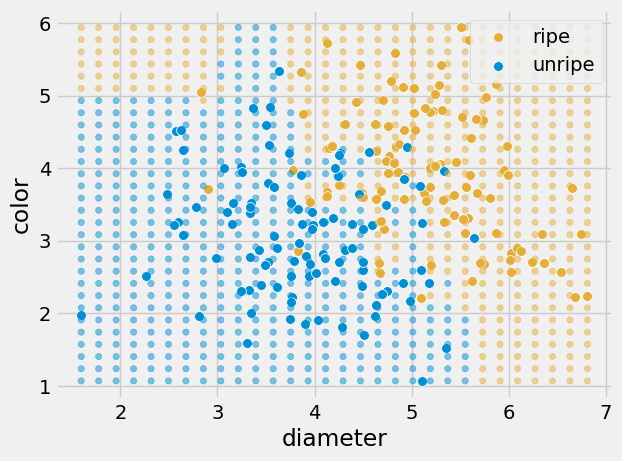

In [91]:
def decide_class_rf(prediction):
    '''
    Decide class 'blue' or 'orange' based on prediction of a 
    random forest classifier
    '''
    if prediction == 0:
        return('C0')
    elif prediction == 1: 
        return('C2')
    else:
        return('C4')


# Add predictions for all mesh points 
N = 30
plot_classes_on_mesh(df['diameter'], df['color'], N, 
                     model, decide_class_rf);



## How about a Naive Bayes classifier? 

(haven't seen this before but note the identical workflow)

<br/> 

In [92]:
from sklearn.naive_bayes import GaussianNB

###############################################
# Split data to training and testing datasets #
###############################################
X_train, X_test, y_train, y_test = \
    train_test_split(df[['diameter','color']], 
                     df['ripe'], test_size=0.005)

##############################################
# Initialize an instance of the model object #
##############################################
model = GaussianNB()

##########################################
# Train the model / fit model parameters #
##########################################
model.fit(X_train, y_train)

##################
# Test the model #
##################
print('Testing datapoint:\n') 
print(X_test)

# use the scikit-learn predict function
y_pred = float(model.predict(X_test)[0])

print('\nModel prediction:\n')
print(f'y = {round(y_pred, 2)}')




Testing datapoint:

     diameter     color
171  5.283446  5.143216

Model prediction:

y = 1.0


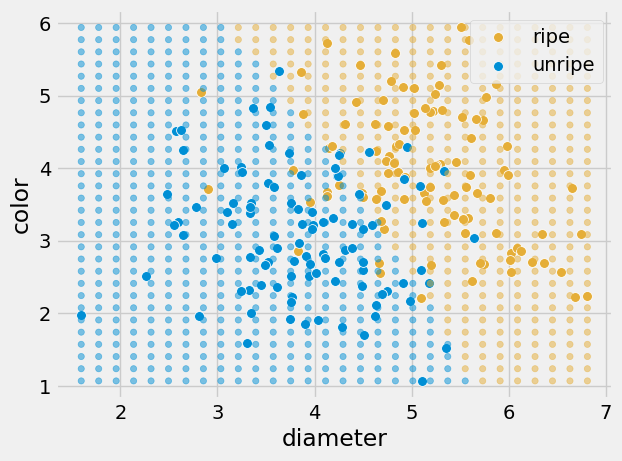

In [93]:
def decide_class_gnb(prediction):
    '''
    Decide class 'blue' or 'orange' based on prediction of a 
    naive bayes classifier
    '''
    if prediction == 0:
        return('C0')
    elif prediction == 1: 
        return('C2')
    else:
        return('C4')


# Add predictions for all mesh points 
N = 30
plot_classes_on_mesh(df['diameter'], df['color'], N, 
                     model, decide_class_knn);



## Or a Support Vector Machine?

(haven't seen this before but note the identical workflow)

<br/> 

In [94]:
from sklearn import svm

###############################################
# Split data to training and testing datasets #
###############################################
X_train, X_test, y_train, y_test = \
    train_test_split(df[['diameter','color']], 
                     df['ripe'], test_size=0.005)

##############################################
# Initialize an instance of the model object #
##############################################
model = svm.SVC(kernel='linear') # Linear Kernel

##########################################
# Train the model / fit model parameters #
##########################################
model.fit(X_train, y_train)

##################
# Test the model #
##################
print('Testing datapoint:\n') 
print(X_test)

# use the scikit-learn predict function
y_pred = float(model.predict(X_test)[0])

print('\nModel prediction:\n')
print(f'y = {round(y_pred, 2)}')




Testing datapoint:

    diameter     color
14  2.779716  3.464217

Model prediction:

y = 0.0


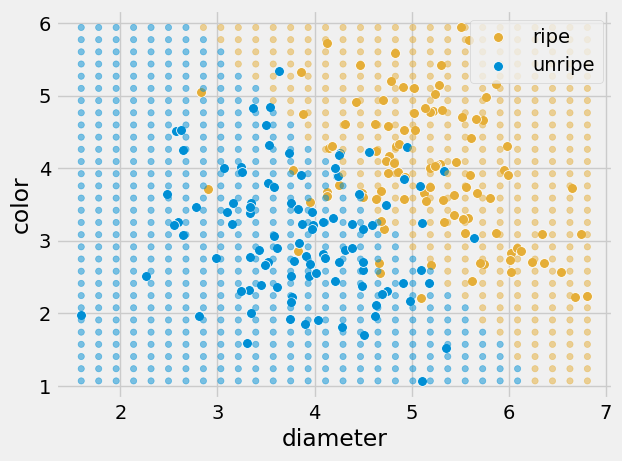

In [95]:
def decide_class_svm(prediction):
    '''
    Decide class 'blue' or 'orange' based on prediction of a 
    support vector machine classifier
    '''
    if prediction == 0:
        return('C0')
    elif prediction == 1: 
        return('C2')
    else:
        return('C4')


# Add predicitons for all mesh points 
N = 30
plot_classes_on_mesh(df['diameter'], df['color'], N, 
                     model, decide_class_svm);



## (All of the above are examples of) Supervised Learning

One thing in common to all of the examples above is that we always used a **labeled datasets to train** the machine to classify or predict outcomes.

</br> 

</br> 


## (There is also) Unsupervised Learning

Algorithms that analyze **unlabeled datasets** in order to cluster them or discover hidden patterns without the need for (human) intervention.

</br> 

</br> 



## (And) Semisupervised Learning

A small amount of the data is labeled and a larger unlabeled dataset is also available for training. 


## These examples raise questions which we should address (throughout the course) 

* Are there other types of classifiers? (Yes...) 
* How do we decide between models? 
* How do we **evaluate** individual models and compare between them? 
* How else do we evaluate? </br> 
Different and sometimes contradicting metrics may best suit different goals.
* If the model has parameters, e.g., the number of nearest neighbors to consider, </br>
how do we determine the best values? 
* How do we know if all the data points are trust worthy (anomaly detection)? 

...

[//]: # "https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn" 

[//]: # "https://www.datacamp.com/tutorial/naive-bayes-scikit-learn" 

[//]: # "https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/" 

[//]: # "https://machinelearningmastery.com/bayes-optimal-classifier/" 

## What steps did we repeatedly go through or imply?

<img src="https://github.com/david-biron/DATA221imgs/blob/main/MLsteps.png?raw=true" width="550">




## And what is it good for? 

| Name | In words | For instance | 
|:---|:---|:---|
| Regression | Predicting values | Marketing  |
| Classification | Arranging in categories | Medical diagnosis |
| Transcription | Converting audio (or video) to text | Automatic translation |
| Structured output | Answering specific questions | Map annotation, Automatic coding |
| Anomaly detection | Identifying fraudulent or unusual patterns | Fake news, Stolen credit cards |
| Noise/error removal | Cleaning data from instruments or humans | Remote sensing, Astronomy |
| Density estimation | Fitting parameters or curves relating to likelihoods | Matching fingerprints or DNA |






## How do we evaluate models? 

We will repeatedly return to this question. 

Three related ideas to keep in mind: 

### 1. Overfitting undermines predictions

A model that does an excellent job fitting available data is not necessarily great for predictions. 

<table>
    <tr>
        <td><img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/Overfitting1Examples.png" width="435"></td>
        <td><img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/Overfitting2Error.png" width="365"></td>
    </tr>
</table>

### 2. The output of a model depends heavily on the input/training data

<table>
    <tr>
        <td><img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/WeaponsOfMathDestruction.png" width="130"></td>
        <td><img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/TapedSignTesla.png" width="230"></td>
        <td><img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/AI_Bias.png" width="200"></td>
    </tr>
</table>


### 3. ML systems can fail in strange ways

<img src="https://github.com/david-biron/DATA221imgs/blob/main/AnimalPicsClassifier1.png?raw=true" width="500"> 



<img src="https://github.com/david-biron/DATA221imgs/blob/main/AnimalPicsClassifier2.png?raw=true" width="600">